# Incorporando Análisis de Hofstede en GED

Este notebook trabaja con los datos originados por la iniciativa iGEDS, en particular datos a nivel internacional de 106 países que describen 5 pilares principales:

*   Foundational Institutions
*   Innovation capability
*   Entrepreneurship capability
*   Comparative Advantage
*   Social Impact
*   Economic Impact

Sumado a esto, se incorpora la información de 80 países correspondiente en el análisis antropológico de Hofstede, en el cual se comparan los valores culturales de distintos países con base en un análisis estadístico de las respuestas a un instrumento, o encuesta, que se enfoca en 6 dimensiones:

*   Individualism vs. Collectivism
*   Uncertainty avoidance
*   Power distance ~ strength of social hierarchy
*   Masculinity vs. Feminity
*   Long term orientation
*   Indulgence vs. Self restraint

En este código se realiza lo siguiente

-   Re-escalan todas las métricas a valores entre 1-5 
-   Imputan valores faltantes para algunos paises 
-   Visualiza la distribución de las métricas por país.

## Parte 1: Importe de paquetes de Python, y de Datos 

In [53]:
! pip install pingouin
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import scipy.stats as stats

Importe de datos originales:

In [54]:
data = pd.read_csv('iEcosystems + Hofstede (106 countries dataset) - Indicators.csv')
#data

## Parte 2: Obtención del Tidy DataFrame

En esta parte obtendremos el **tidy** dataframe, el cual contiene: una característica por columna y una observación por fila. Comenzamos removiendo los valores más altos y bajos, y asignamos el nombre del país como índice: 

In [55]:
minimums = data.iloc[106,3:].astype(float).values
maximums = data.iloc[107,3:].astype(float).values
df = data.drop(axis=0, index=[106,107])
df.set_index('Country', inplace=True)
df

,Region,Development Stage,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),...,6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),6.05 FDI inward flow as % of GDP (UNCTAD),GNI per capita (WB),SEDA Score (BCG),Power Distance Index (PDI),Individualism versus Collectivism (IDV),Masculinity versus Feminity (MAS),Uncertainty Avoidance Index (UAI),Long Term Orientation versus Short Term Normative Orientation (LTO),Indulgence versus Restraint (IVR)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Europe and Central Asia,Economies in transition,67.7,91.8,65.2,67.7,53.5,57.1,38.8,52.1,...,13.8,8.46,5240,54.3,NaN,NaN,NaN,NaN,61.0,15.0
Algeria,Middle East and North Africa,Developing economies,48.6,78.0,53.9,49.2,54.8,37.9,28.3,50.5,...,10.2,0.84,3970,43.1,NaN,NaN,NaN,NaN,26.0,32.0
Argentina,Latin America and the Caribbean,Developing economies,59.0,80.4,49.3,40.0,57.5,50.5,49.7,46.5,...,8.4,2.36,11200,55.8,49.0,46.0,56.0,86.0,20.0,62.0
Armenia,Europe and Central Asia,Economies in transition,74.5,96.1,81.5,44.6,69.7,60.7,43.4,72.5,...,17.7,2.02,4680,50.3,NaN,NaN,NaN,NaN,61.0,NaN
Australia,East Asia and Pacific,Developed economies,81.2,96.6,85.7,78.9,79.0,82.8,89.3,84.0,...,5.6,4.20,54910,81.6,38.0,90.0,61.0,51.0,21.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,Europe and Central Asia,Developed economies,83.5,94.6,86.2,80.3,68.7,92.2,89.9,73.1,...,4.3,2.29,42370,76.1,35.0,89.0,66.0,35.0,51.0,69.0
United States,North America,Developed economies,84.0,91.6,86.8,90.5,73.4,81.8,77.2,87.9,...,4.4,1.22,65760,76.3,40.0,91.0,62.0,46.0,26.0,68.0
Uruguay,Latin America and the Caribbean,Developing economies,61.5,89.6,70.3,53.6,56.3,72.0,73.5,71.0,...,7.9,-1.05,16230,64.0,61.0,36.0,38.0,98.0,26.0,53.0


Proceso de re-escalamiento:

In [56]:
df_scaled = df.copy()
df_scaled = df_scaled.drop('Region', axis=1)
df_scaled = df_scaled.drop('Development Stage', axis=1)

columns = df_scaled.columns.values.tolist()

for column, minval, maxval in zip(columns, minimums, maximums):
    df_scaled[column] = df_scaled[column].apply(lambda x: (x-minval)/(maxval-minval))
    df_scaled[column] = df_scaled[column].apply(lambda x: 1+4*x)


df_scaled

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),...,6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),6.05 FDI inward flow as % of GDP (UNCTAD),GNI per capita (WB),SEDA Score (BCG),Power Distance Index (PDI),Individualism versus Collectivism (IDV),Masculinity versus Feminity (MAS),Uncertainty Avoidance Index (UAI),Long Term Orientation versus Short Term Normative Orientation (LTO),Indulgence versus Restraint (IVR)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3.708,4.672,3.608,3.708,3.140,3.284,2.552,3.084,4.536,2.44,...,2.549550,3.394919,1.236727,3.172,NaN,NaN,NaN,NaN,3.44,1.60
Algeria,2.944,4.120,3.156,2.968,3.192,2.516,2.132,3.020,3.648,2.40,...,3.198198,2.515012,1.174866,2.724,NaN,NaN,NaN,NaN,2.04,2.28
Argentina,3.360,4.216,2.972,2.600,3.300,3.020,2.988,2.860,3.768,2.60,...,3.522523,2.690531,1.527034,3.232,2.96,2.84,3.24,4.44,1.80,3.48
Armenia,3.980,4.844,4.260,2.784,3.788,3.428,2.736,3.900,4.224,2.40,...,1.846847,2.651270,1.209450,3.012,NaN,NaN,NaN,NaN,3.44,NaN
Australia,4.248,4.864,4.428,4.156,4.160,4.312,4.572,4.360,4.528,4.08,...,4.027027,2.903002,3.656113,4.264,2.52,4.60,3.44,3.04,1.84,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.340,4.784,4.448,4.212,3.748,4.688,4.596,3.924,4.456,4.20,...,4.261261,2.682448,3.045300,4.044,2.40,4.56,3.64,2.40,3.04,3.76
United States,4.360,4.664,4.472,4.620,3.936,4.272,4.088,4.516,4.192,3.84,...,4.243243,2.558891,4.184608,4.052,2.60,4.64,3.48,2.84,2.04,3.72
Uruguay,3.460,4.584,3.812,3.144,3.252,3.880,3.940,3.840,4.096,3.80,...,3.612613,2.296767,1.772041,3.560,3.44,2.44,2.52,4.92,2.04,3.12


In [57]:
sum(list(df.isnull().sum()))

886

Con esto tenemos los datos re-escalados del 1-5. Aún así, algunas entradas tienen valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**, considerando los 5 vecinos más cercanos. Total de valores faltantes: 886.

In [58]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
var = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(var)
var = np.where(var>5,5,var)      #adjust values to 5 or 1 when these are out of bounds
var = np.where(var<1,1,var)

df_imputed.columns = columns
df_imputed.index = df_scaled.index
#pd.set_option('max_columns', None, 'max_rows', None)
df_imputed.head()

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),...,6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),6.05 FDI inward flow as % of GDP (UNCTAD),GNI per capita (WB),SEDA Score (BCG),Power Distance Index (PDI),Individualism versus Collectivism (IDV),Masculinity versus Feminity (MAS),Uncertainty Avoidance Index (UAI),Long Term Orientation versus Short Term Normative Orientation (LTO),Indulgence versus Restraint (IVR)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3.708,4.672,3.608,3.708,3.140,3.284,2.552,3.084,4.536,2.44,...,2.549550,3.394919,1.236727,3.172,3.760,1.664,2.680,4.248,3.44,1.60
Algeria,2.944,4.120,3.156,2.968,3.192,2.516,2.132,3.020,3.648,2.40,...,3.198198,2.515012,1.174866,2.724,3.552,2.256,3.056,3.936,2.04,2.28
Argentina,3.360,4.216,2.972,2.600,3.300,3.020,2.988,2.860,3.768,2.60,...,3.522523,2.690531,1.527034,3.232,2.960,2.840,3.240,4.440,1.80,3.48
Armenia,3.980,4.844,4.260,2.784,3.788,3.428,2.736,3.900,4.224,2.40,...,1.846847,2.651270,1.209450,3.012,3.896,2.608,3.128,3.896,3.44,2.04
Australia,4.248,4.864,4.428,4.156,4.160,4.312,4.572,4.360,4.528,4.08,...,4.027027,2.903002,3.656113,4.264,2.520,4.600,3.440,3.040,1.84,3.84


In [59]:
sum(list(df_imputed.isnull().sum()))

0

## Parte 3: DataFrame organizado por pilares

Tenemos los datos limpios, re-escalados, sin valores faltantes. Podemos ahora podemos reorganizar nuestros datos como sigue: tomaremos registro del pilar al que corresponde cada métrica de iEcosystems.

Consideramos cada una de las dimensiones de Hofstede como pilar en este proceso de reorganización.

In [60]:
df_means = df_imputed.T

pillars = pd.read_excel('https://github.com/NunezKant/iGEDS/blob/master/iEcosystems%20(106%20countries%20dataset).xlsx?raw=true', decimal = ',', sheet_name=1)
pillars = pillars['Pillar'].values
pillars = np.append(pillars, ['Power Distance Index (PDI)',
            'Individualism versus Collectivism (IDV)', 
            'Masculinity versus Feminity (MAS)',
            'Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation versus Short Term Normative Orientation (LTO)', 
            'Indulgence versus Restraint (IVR)'], axis=0)

df_means['Pillars'] = pillars
df_means

Country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belgium,Bosnia and Herzegovina,...,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,Zambia,Pillars
1.01 Ease of doing business (WB),3.708,2.944,3.360,3.980,4.248,4.148,4.068,2.800,4.000,3.616,...,3.748,4.072,3.808,4.236,4.340,4.360,3.460,3.792,3.676,1 Foundational Institutions
1.02 Starting a business (WB),4.672,4.120,4.216,4.844,4.864,4.328,4.848,4.296,4.692,3.400,...,4.784,4.552,4.644,4.792,4.784,4.664,4.584,4.404,4.396,1 Foundational Institutions
1.03 Paying taxes (WB),3.608,3.156,2.972,4.260,4.428,4.340,4.360,3.244,4.136,3.416,...,3.776,4.464,4.124,4.412,4.448,4.472,3.812,3.760,4.556,1 Foundational Institutions
1.04 Resolving Insolvency (WB),3.708,2.968,2.600,2.784,4.156,4.096,3.540,2.124,4.364,3.728,...,3.168,2.540,2.256,2.972,4.212,4.620,3.144,2.520,2.972,1 Foundational Institutions
1.05 Enforcing contracts (WB),3.140,3.192,3.300,3.788,4.160,4.020,3.812,1.888,3.572,3.312,...,3.336,3.856,3.544,4.036,3.748,3.936,3.252,3.484,3.032,1 Foundational Institutions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Individualism versus Collectivism (IDV),1.664,2.256,2.840,2.608,4.600,3.200,1.896,1.800,4.000,3.080,...,2.288,2.480,1.928,3.800,4.560,4.640,2.440,1.800,1.504,Individualism versus Collectivism (IDV)
Masculinity versus Feminity (MAS),2.680,3.056,3.240,3.128,3.440,4.160,2.960,3.200,3.160,2.984,...,2.768,2.800,2.808,2.896,3.640,3.480,2.520,2.600,2.856,Masculinity versus Feminity (MAS)
Uncertainty Avoidance Index (UAI),4.248,3.936,4.440,3.896,3.040,3.800,3.680,3.400,4.760,3.760,...,4.088,4.400,3.832,3.264,2.400,2.840,4.920,2.200,4.328,Uncertainty Avoidance Index (UAI)
Long Term Orientation versus Short Term Normative Orientation (LTO),3.440,2.040,1.800,3.440,1.840,3.400,3.440,2.880,4.280,3.800,...,2.464,2.840,4.440,2.952,3.040,2.040,2.040,3.280,2.200,Long Term Orientation versus Short Term Normat...


Tomaremos la media por pilar de cada país. 

In [61]:
df_means = df_means.groupby('Pillars').mean().T
df_means.rename(columns={"Long Term Orientation versus Short Term Normative Orientation (LTO)":"Long Term Orientation (LTO)"}, inplace=True)
df_means

Pillars,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,...,5 Social Impact,6 Economic Impact,GNI per capita,Individualism versus Collectivism (IDV),Indulgence versus Restraint (IVR),Long Term Orientation (LTO),Masculinity versus Feminity (MAS),Power Distance Index (PDI),SEDA Score,Uncertainty Avoidance Index (UAI)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3.4732,2.207633,1.337470,2.598926,2.929778,1.5660,3.428110,2.045130,3.478800,2.3690,...,3.935356,2.738519,1.236727,1.664,1.60,3.44,2.680,3.760,3.172,4.248
Algeria,3.0096,2.192006,1.674710,2.383803,2.573333,2.4276,3.182732,1.738879,3.473333,3.2058,...,3.715319,2.324024,1.174866,2.256,2.28,2.04,3.056,3.552,2.724,3.936
Argentina,3.1684,2.021985,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,...,3.984246,2.405071,1.527034,2.840,3.48,1.80,3.240,2.960,3.232,4.440
Armenia,3.6344,2.187459,1.398630,2.837184,2.718222,1.3420,3.314949,2.167727,3.614267,2.6556,...,3.820191,3.070693,1.209450,2.608,2.04,3.44,3.128,3.896,3.012,3.896
Australia,4.3708,2.878032,2.064750,3.294983,3.268889,2.8508,3.752603,2.823880,4.229333,3.4370,...,4.423548,3.275445,3.656113,4.600,3.84,1.84,3.440,2.520,4.264,3.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.3396,3.340008,1.967984,3.715226,3.709333,3.9660,2.853192,3.973914,4.286000,3.8236,...,4.134732,3.079245,3.045300,4.560,3.76,3.04,3.640,2.400,4.044,2.400
United States,4.2960,3.199162,3.764866,3.606783,4.223556,3.4960,3.722513,7.088756,4.288533,4.3330,...,3.863439,3.335960,4.184608,4.640,3.72,2.04,3.480,2.600,4.052,2.840
Uruguay,3.7808,2.346297,1.464989,2.833698,2.578222,1.2428,3.046434,2.006035,3.926000,2.7408,...,4.495705,2.605598,1.772041,2.440,3.12,2.04,2.520,3.440,3.560,4.920


## Parte 4: Correlaciones de los promedios de pilares

Ahora podemos obtener la matriz de correlación, a partir de la cual podemos plantear preguntas acerca de cómo se relacionan los diferentes pilares que estamos estudiando. 

Primero que nada, nuestras principales herramientas:

*   `significant_corr`: para cualesquiera dos columnas obtiene su correlación Pearson
*   `print_significant_corr`: si la correlación es estadísticamente significativa, imprime dicha información y grafica el conjunto de datos evaluado en estos dos pilares

In [62]:
def significant_corr(df1,df2,a,b):
    '''
    This function computed the pearson correlation between two data sets a, b, 
    and determines whether this correlation is significant or not. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : a tuple (B,N) where B is a boolean that answers the question:
    ~do a and b present significant correlation? i.e. p-value<0.1,
    and N=0 is B=False, or N=p-val(a,b) if B=True
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return (True, r[0], r[1])
    else:
        return (False, r[0], r[1])
    
    
    

def print_significant_corr(df1,df2,a,b):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        print(f'Correlation between:  ' + a + '   and   ' + b)
        print('**********************************************')
        print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
        print('*Statistically significant*')
        print('***********************************************')
        return True
    

Nos interesa como se relacionan las métricas con las variables de salida:

*   4 Comparative Advantage
*   5 Impact

Primero obtenemos la matriz de correlaciones y la representamos visualmente por medio de un Heatmap:

In [63]:
corr = df_means.corr()

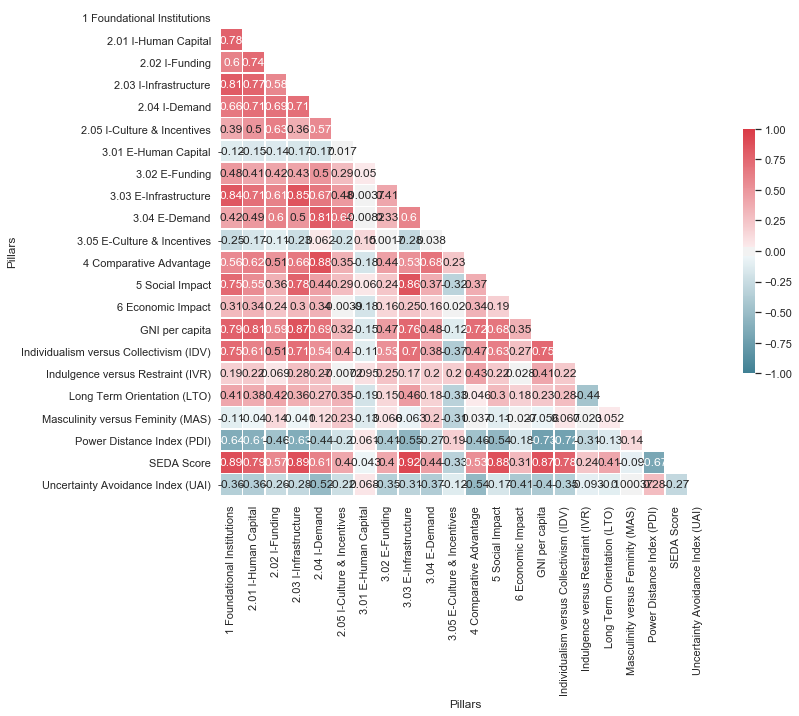

In [64]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Parte 5: Unificación de Pilares de Innovación y de Emprendimiento

Los pilares de capacidades de Innovación (2) y Emprendimiento (3) son el enfoque de esta parte del código. En particular nos interesa ver qué sucede al unificar cada uno de estos pilares, por separado, y qué sucede cuando unificamos los dos pilares. 

In [65]:
i_e_unified = df_means.T.copy()

#building i_e_unified
pillars_L = ['1 Foundational Institutions']
pillars_L += ['2 Innovation Capacity']*5 
pillars_L += ['3 Entrepreneurship Capacity']*5 
pillars_L += ['4 Comparative Advantage', 
                          '5 Social Impact',
                          '6 Economic Impact',
                          'GNI per capita' ,
                          '8 SEDA Score']
pillars_L += ['Power Distance Index (PDI)',
                          'Individualism versus Collectivism (IDV)', 
                          'Masculinity versus Feminity (MAS)',
                          'Uncertainty Avoidance Index (UAI)',
                          'Long Term Orientation (LTO)', 
                          'Indulgence versus Restraint (IVR)']
i_e_unified['Pillar'] = pillars_L
i_e_unified = i_e_unified.groupby('Pillar').mean().T

#column unifying I&E capacity - each of these pilars contains 5 components
combined_L=[]
for i in range(len(i_e_unified['2 Innovation Capacity'])):
    icap = i_e_unified['2 Innovation Capacity'][i]
    ecap = i_e_unified['3 Entrepreneurship Capacity'][i]
    combined_L.append(0.5*icap + 0.5*ecap)
i_e_unified['2&3 I&E Capacity'] = combined_L
i_e_unified


Pillar,1 Foundational Institutions,2 Innovation Capacity,3 Entrepreneurship Capacity,4 Comparative Advantage,5 Social Impact,6 Economic Impact,8 SEDA Score,GNI per capita,Individualism versus Collectivism (IDV),Indulgence versus Restraint (IVR),Long Term Orientation (LTO),Masculinity versus Feminity (MAS),Power Distance Index (PDI),Uncertainty Avoidance Index (UAI),2&3 I&E Capacity
Country,,,,,,,,,,,,,,,
Albania,3.4732,2.127962,2.890845,2.074467,3.935356,2.738519,1.664,1.236727,3.44,4.248,3.172,2.680,1.60,3.760,2.509403
Algeria,3.0096,2.250291,2.990362,2.399133,3.715319,2.324024,2.256,1.174866,2.04,3.936,2.724,3.056,2.28,3.552,2.620326
Argentina,3.1684,2.193493,2.908913,2.583067,3.984246,2.405071,2.840,1.527034,1.80,4.440,3.232,3.240,3.48,2.960,2.551203
Armenia,3.6344,2.096699,3.053003,2.593067,3.820191,3.070693,2.608,1.209450,3.44,3.896,3.012,3.128,2.04,3.896,2.574851
Australia,4.3708,2.871491,3.457969,3.316533,4.423548,3.275445,4.600,3.656113,1.84,3.040,4.264,3.440,3.84,2.520,3.164730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.3396,3.339710,3.618619,3.884867,4.134732,3.079245,4.560,3.045300,3.04,2.400,4.044,3.640,3.76,2.400,3.479165
United States,4.2960,3.658073,4.587915,4.095000,3.863439,3.335960,4.640,4.184608,2.04,2.840,4.052,3.480,3.72,2.600,4.122994
Uruguay,3.7808,2.093201,2.954076,2.482667,4.495705,2.605598,2.440,1.772041,2.04,4.920,3.560,2.520,3.12,3.440,2.523639


Obtención de la matriz de correlaciones y la visualización por medio de un Heatmap:

In [66]:
corr = i_e_unified.corr()

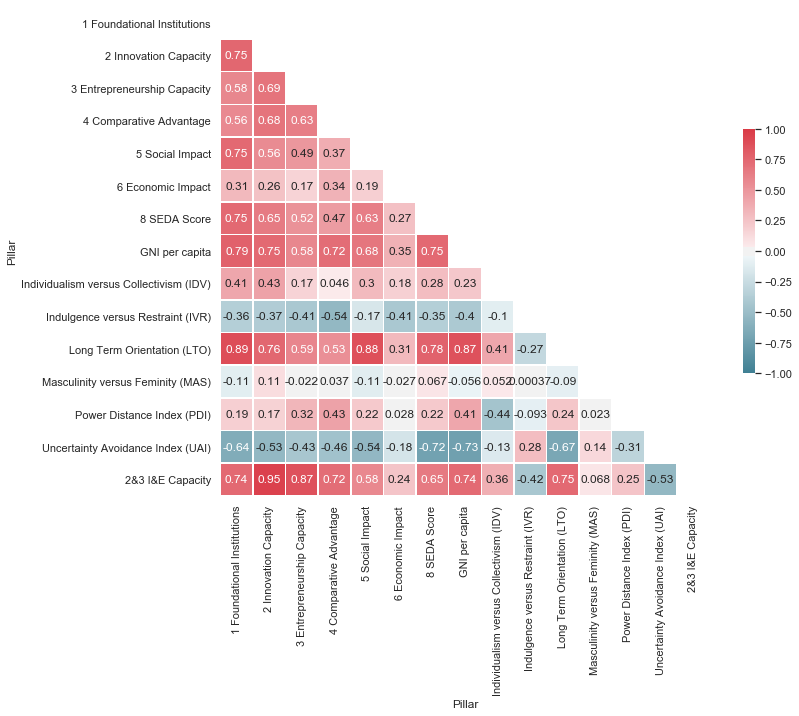

In [83]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(10, 190, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Para completar la lectura del Heatmap anteriormente presentado, enlistamos la lista de aquellas parejas de columnas del DataFrame `i_e_unified` que tienen una correlación significativa. 

In [84]:
columns = list(i_e_unified.columns)
for c1 in columns:
    for c2 in ['Power Distance Index (PDI)',
               'Individualism versus Collectivism (IDV)', 
               'Masculinity versus Feminity (MAS)','Uncertainty Avoidance Index (UAI)',
               'Long Term Orientation (LTO)', 
               'Indulgence versus Restraint (IVR)']:
        if c1!=c2 and significant_corr(i_e_unified,i_e_unified,c1,c2)[0]==True:
            print_significant_corr(i_e_unified,i_e_unified,c1,c2)
            print('')
            print('')
            print('')

Correlation between:  1 Foundational Institutions   and   Power Distance Index (PDI)
**********************************************
Pearson Correlation: 0.1948041189633967, p-value: 0.04538542327580034
*Statistically significant*
***********************************************



Correlation between:  1 Foundational Institutions   and   Individualism versus Collectivism (IDV)
**********************************************
Pearson Correlation: 0.41217224670816993, p-value: 1.1332332460067864e-05
*Statistically significant*
***********************************************



Correlation between:  1 Foundational Institutions   and   Uncertainty Avoidance Index (UAI)
**********************************************
Pearson Correlation: -0.6370399244133144, p-value: 2.1190785191169787e-13
*Statistically significant*
***********************************************



Correlation between:  1 Foundational Institutions   and   Long Term Orientation (LTO)
*******************************************

## Parte 6: Correlación de métricas de colaboración con Impacto

Estudiaremos qué correlaciones tienen cada una de las métricas de colaboratividad con aquellas de impacto. 

Para ello, vamos a ordenar los datos de los pilares de Impacto Social y Económico de:
* Argentina
* Brasil
* Chile
* España
* México
* Uruguay

Y vamos a leer la correlación de ambos impactos con cada una de las 11 métricas de colaboratividad con que contamos. Es decir, la métrica original y las 10 propuestas.

In [86]:
# primero conseguimos los datos de los 6 países estudiados
countries={'Mexico':'México',
          'Uruguay':'Uruguay',
          'Spain':'España',
          'Brazil':'Brasil',
          'Argentina':'Argentina',
          'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)

df1 = df_means_countries_studied[['5 Social Impact', '6 Economic Impact', 'GNI per capita', 'SEDA Score','Power Distance Index (PDI)','Individualism versus Collectivism (IDV)', 
            'Masculinity versus Feminity (MAS)','Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation (LTO)', 
            'Indulgence versus Restraint (IVR)']]

#luego conseguimos el dataframe donde se encuentra la vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#now we obtain colaborativities for each city
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df = pd.concat([df1, df2, df3], axis=1)
df

,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score,Power Distance Index (PDI),Individualism versus Collectivism (IDV),Masculinity versus Feminity (MAS),Uncertainty Avoidance Index (UAI),Long Term Orientation (LTO),Indulgence versus Restraint (IVR),...,Ranking Capitals 5,Ranking Capitals 6,Ranking Capitals 7,Ranking Capitals 8,Ranking Capitals 9,Ranking Capitals 10,Ranking Capitals 11,Ranking Capitals 12,Ranking Capitals 13,Ranking Capitals 14
México,3.916166,2.665218,1.440818,2.968,4.24,2.20,3.76,4.28,1.96,4.88,...,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Uruguay,4.495705,2.605598,1.772041,3.560,3.44,2.44,2.52,4.92,2.04,3.12,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
España,4.111115,2.675696,2.461763,3.900,3.28,3.04,2.68,4.44,2.92,2.76,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Brasil,3.996738,2.389177,1.426206,2.972,3.76,2.52,2.96,4.04,2.76,3.36,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Argentina,3.984246,2.405071,1.527034,3.232,2.96,2.84,3.24,4.44,1.80,3.48,...,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Chile,4.424643,2.676299,1.712616,3.504,3.52,1.92,2.12,4.44,2.24,3.72,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [87]:
impacts = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score']
others = list(df.columns)
for i in impacts:
    others.remove(i)
    
significants = {x:[] for x in impacts}


df_correls = pd.DataFrame()
df_correls['Correl data'] = others
for i in impacts:
    booleans_i = []
    correls_i = []
    p_vals_i = []
    for c in others:
        triple = significant_corr(df,df,i,c)
        booleans_i.append(triple[0])
        correls_i.append(triple[1])
        p_vals_i.append(triple[2])
        if triple[0]==True:
            significants[i].append(c)
    df_correls['Significant with '+str(i)] = booleans_i
    df_correls['R^2 with '+str(i)] = correls_i
    df_correls['P-value with '+str(i)] = p_vals_i

    
df_correls       

,Correl data,Significant with 5 Social Impact,R^2 with 5 Social Impact,P-value with 5 Social Impact,Significant with 6 Economic Impact,R^2 with 6 Economic Impact,P-value with 6 Economic Impact,Significant with Impact Before,R^2 with Impact Before,P-value with Impact Before,Significant with GNI per capita,R^2 with GNI per capita,P-value with GNI per capita,Significant with SEDA Score,R^2 with SEDA Score,P-value with SEDA Score
0,Power Distance Index (PDI),False,-0.244313,0.640821,False,0.300662,0.562596,False,-0.288762,0.578896,False,-0.408070,0.421871,False,-0.560808,0.246977
1,Individualism versus Collectivism (IDV),False,-0.378086,0.459894,False,-0.340948,0.508395,False,-0.343815,0.504599,False,0.521045,0.289161,False,0.349379,0.497255
2,Masculinity versus Feminity (MAS),True,-0.852481,0.031038,False,-0.267325,0.608565,False,-0.780699,0.066866,False,-0.447239,0.373871,False,-0.673742,0.142302
3,Uncertainty Avoidance Index (UAI),False,0.748765,0.086750,False,0.378036,0.459959,True,0.834423,0.038854,False,0.335020,0.516270,False,0.593518,0.214261
4,Long Term Orientation (LTO),False,-0.068455,0.897478,False,0.054227,0.918739,False,-0.192325,0.715069,False,0.570526,0.237064,False,0.351234,0.494814
5,Indulgence versus Restraint (IVR),False,-0.382058,0.454798,False,0.185323,0.725198,False,-0.315643,0.542259,False,-0.645065,0.166611,False,-0.694317,0.125881
6,Colab 0,False,0.782985,0.065533,False,0.125720,0.812414,True,0.828698,0.041503,False,0.098178,0.853207,False,0.425015,0.400864
7,Colab 1,True,0.849821,0.032137,False,0.204787,0.697114,True,0.884269,0.019315,False,0.114591,0.828866,False,0.446593,0.374646
8,Colab 2,False,0.781683,0.066291,False,0.162495,0.758402,True,0.833012,0.039499,False,0.081324,0.878283,False,0.407075,0.423115
9,Colab 3,True,0.828088,0.041790,False,0.098044,0.853405,True,0.857489,0.029017,False,0.129269,0.807176,False,0.469569,0.347415


## Parte 7: Correlación de iEcos con métricas de los grafos

Hacemos lo mismo de arriba, solo que esta vez incluiremos todas las métricas de los grafos, y todas las métricas de iEcosystems. Sin y con unificación de las Capacidades de Innovación y Emprendimiento.

#### Sin unificación

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df`, un DataFrame que seguiremos estudiando.

In [16]:
#DF1 df_means restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('../PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('../Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_separate = pd.concat([df1, df2, df3], axis=1)
df_i_e_separate

,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score,Impact Before,Colab 10,Ranking Capitals 10
México,3.5224,2.363914,1.238062,2.782979,3.102667,2.5160,3.117368,2.299475,3.701600,3.4260,2.953330,2.928133,3.916166,2.665218,1.440818,2.968,3.725455,0.397667,5.0
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,3.051111,2.482667,4.489483,2.605598,1.772041,3.560,4.147576,0.588490,1.0
España,3.9268,2.822386,1.899159,3.191020,3.077333,3.8300,3.189806,2.423851,4.264933,3.3650,2.614589,2.839333,4.111115,2.675696,2.461763,3.900,3.864545,0.426240,4.0
Brasil,3.1780,1.826706,1.662244,2.707140,2.879111,2.7542,2.975761,1.991287,3.694933,3.4638,3.376030,2.741067,3.996738,2.389177,1.426206,2.972,3.671818,0.384944,6.0
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,2.891282,2.583067,3.984246,2.405071,1.527034,3.232,3.781818,0.492850,2.0
Chile,3.9124,2.413203,1.184934,3.100109,2.965778,1.9536,4.154179,2.207990,3.935067,3.2030,3.469417,3.111200,4.424643,2.676299,1.712616,3.504,4.091818,0.480988,3.0


#### Con unificación de innovación y emprendimiento

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados, con Innovación y Emprendimiento unificados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df`, un DataFrame que seguiremos estudiando.

In [17]:
#DF1 i_e_unified restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = i_e_unified.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('../PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('../Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]  #

for i in range(len(df3['Ranking Capitals 10'])):
    df3['Ranking Capitals 10'][i] *= -1
    df3['Ranking Capitals 10'][i] += 7

df3 = df3.loc[df3['Ciudad'].isin(capitals)]                       #only take capital cities
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country', 'Ranking Capitals 10':'Inverted Ranking Capitals 10'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_unified = pd.concat([df1, df2, df3], axis=1)
df_i_e_unified

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,1 Foundational Institutions,2 Innovation Capacity,3 Entrepreneurship Capacity,4 Comparative Advantage,5 Social Impact,6 Economic Impact,8 SEDA Score,GNI per capita,2&3 I&E Capacity,Impact Before,Colab 10,Inverted Ranking Capitals 10
México,3.5224,2.400724,3.099555,2.928133,3.916166,2.665218,2.968,1.440818,2.750139,3.725455,0.397667,2.0
Uruguay,3.7808,2.070778,2.954209,2.482667,4.489483,2.605598,3.560,1.772041,2.512494,4.147576,0.588490,6.0
España,3.9268,2.963980,3.171636,2.839333,4.111115,2.675696,3.900,2.461763,3.067808,3.864545,0.426240,3.0
Brasil,3.1780,2.365880,3.100362,2.741067,3.996738,2.389177,2.972,1.426206,2.733121,3.671818,0.384944,1.0
Argentina,3.1684,2.199311,2.908913,2.583067,3.984246,2.405071,3.232,1.527034,2.554112,3.781818,0.492850,5.0
Chile,3.9124,2.323525,3.393930,3.111200,4.424643,2.676299,3.504,1.712616,2.858728,4.091818,0.480988,4.0


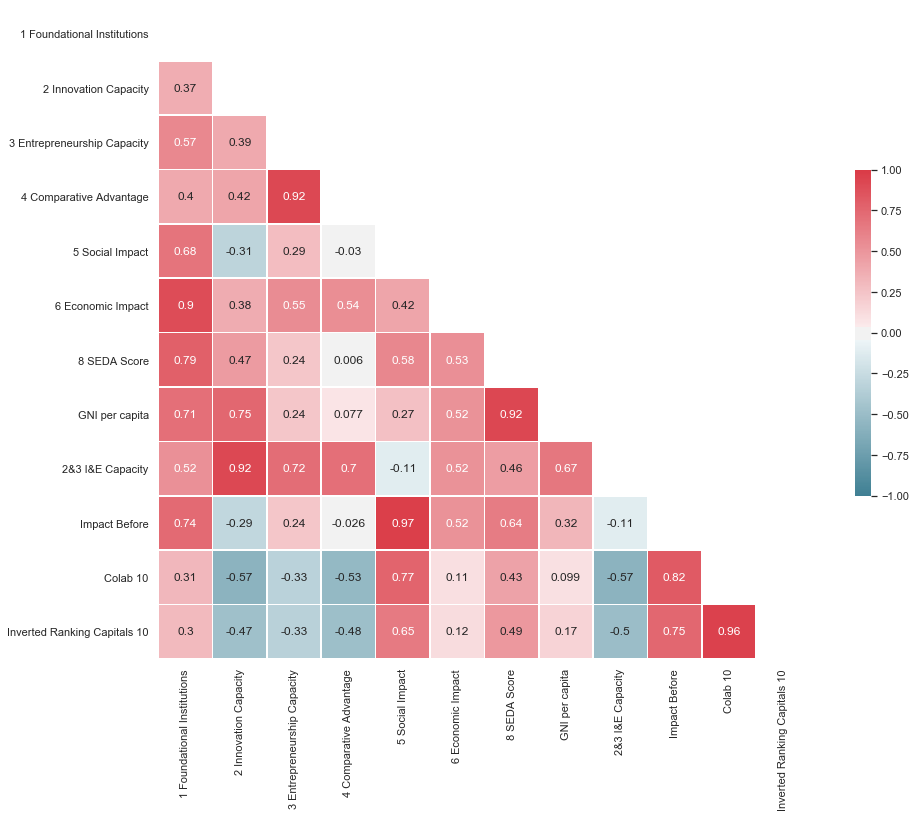

In [18]:
corr = df_i_e_unified.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [19]:
#df_means.rcorr()

In [20]:
#@title significance cheking { display-mode: "form" }

def check_corr_significance(df1, df2, a, b):
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return True, r[0], r[1]
    else:
        return False, r[0], r[1]


#print function 
def print_corr_significance(df1, df2, a, b):
    r = stats.pearsonr(df1[a], df2[b])
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    if r[1] < 0.05:
        print('*Statistically significant*')
        print('**********************************************')
        print('')

        sns.lmplot(x=b, y=a, data=df1)
        return True, r[0], r[1]
    else:
        print('Not significant')
        print('**********************************************')
        print('')

        sns.lmplot(x=b, y=a, data=df1)
    return False, r[0], r[1]
  

Correlation between:  5 Social Impact   and   2.03 I-Infrastructure
**********************************************
Pearson Correlation: 0.7763098292271549, p-value: 1.433161695211522e-22
*Statistically significant*
**********************************************



(True, 0.7763098292271549, 1.433161695211522e-22)

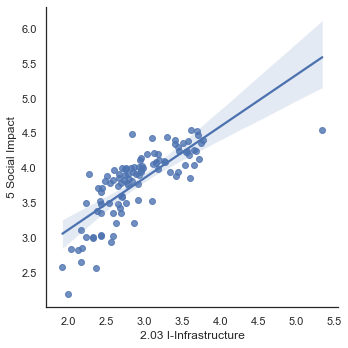

In [21]:
print_corr_significance(df_means, df_means,'5 Social Impact','2.03 I-Infrastructure')

### Correlaciones significativas

Por último en esta sección, vamos a imprimir aquellas correlaciones que son significativas. 

Correlation between:  1 Foundational Institutions   and   6 Economic Impact
**********************************************
Pearson Correlation: 0.9043133220626562, p-value: 0.013295859745018155
*Statistically significant*
**********************************************


Correlation between:  2 Innovation Capacity   and   2&3 I&E Capacity
**********************************************
Pearson Correlation: 0.9210848174017903, p-value: 0.009095682732687113
*Statistically significant*
**********************************************


Correlation between:  3 Entrepreneurship Capacity   and   4 Comparative Advantage
**********************************************
Pearson Correlation: 0.9197914374776552, p-value: 0.009392112828301677
*Statistically significant*
**********************************************


Correlation between:  4 Comparative Advantage   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: 0.9197914374776552, p-value: 0.0093921

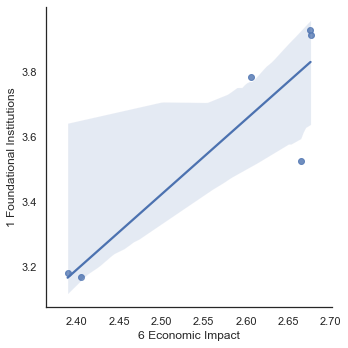

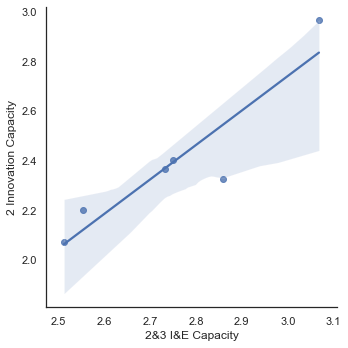

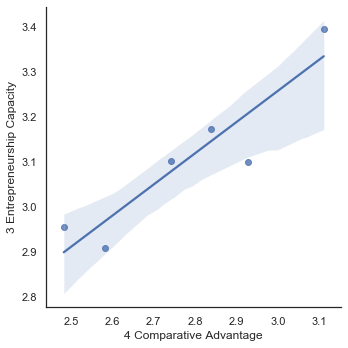

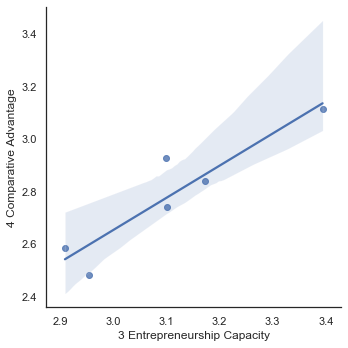

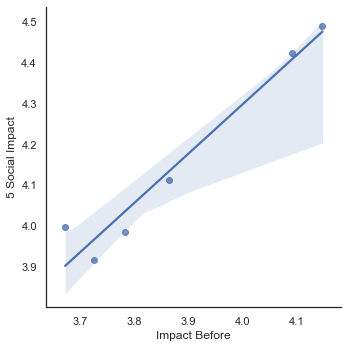

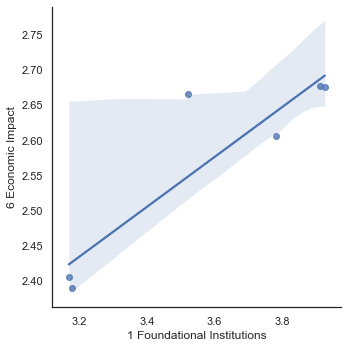

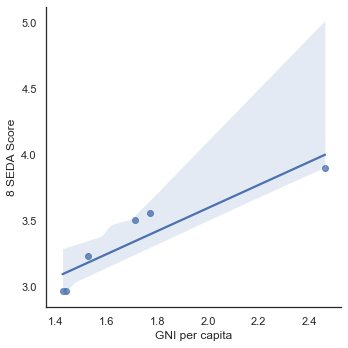

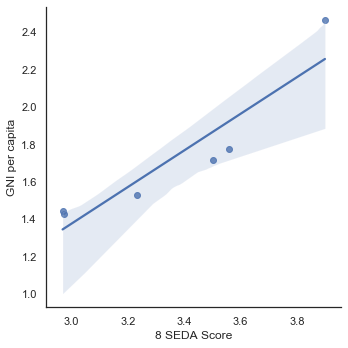

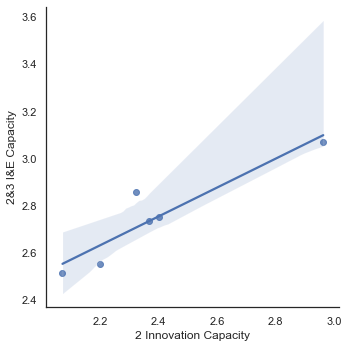

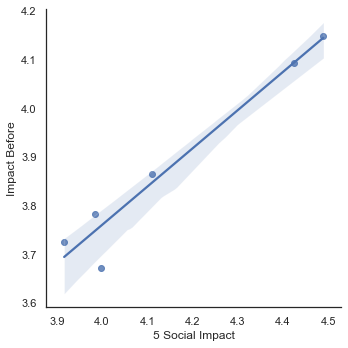

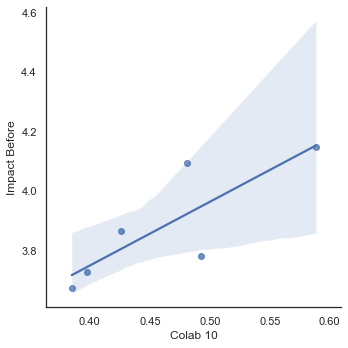

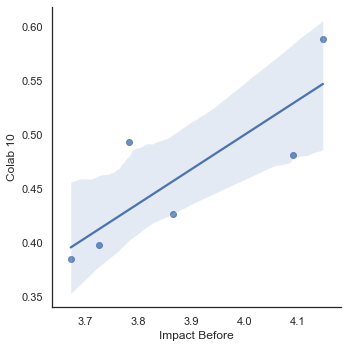

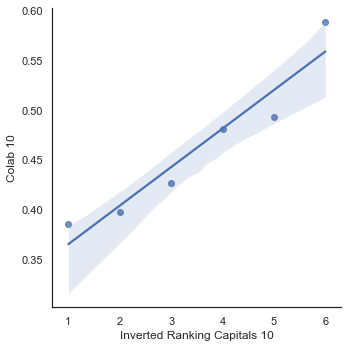

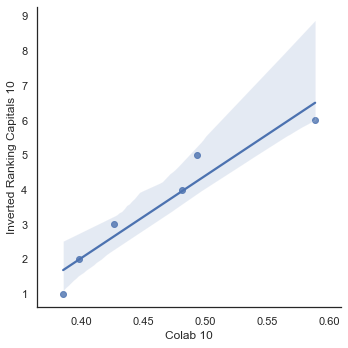

In [22]:
L=list(df_i_e_unified.columns)
for a in L:
    for b in L:
        if a!=b and check_corr_significance(df_i_e_unified, df_i_e_unified, a, b)[0]==True:
            print_corr_significance(df_i_e_unified, df_i_e_unified, a, b)
            print('')
            


## Spider Comparisons

Ahora vamos a hacer visualizaciones tales como mapas de araña para comparar los datos que conocemos de dos capitales. 

In [23]:
#@title Función de spider plot
def make_spider_comparison(df ,country_name1, country_name2):
    from math import pi
    categories=list(df)
    N = len(categories)
  
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure(figsize=(8, 8))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
  
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories )
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
    plt.ylim(0,5)
  
  
    # ------- PART 2: Add plots
  
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
    # Ind1
    values=df.loc[country_name1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
    ax.fill(angles, values, 'b', alpha=0.1)
  
    # Ind2
    values=df.loc[country_name2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
    ax.fill(angles, values, 'r', alpha=0.1)
  
    # Add legend
    plt.legend( bbox_to_anchor=(0.05, 0.25))
    plt.tight_layout()

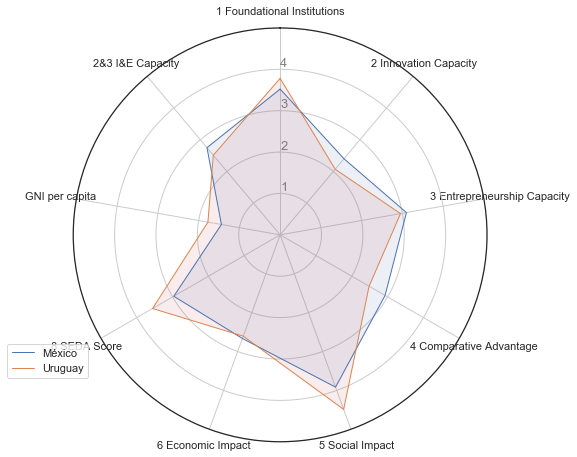

In [24]:
#make_spider_comparison(df_means,'Mexico','Uruguay')
make_spider_comparison(df1,'México','Uruguay')

In [25]:
only_iecos = df_means.drop(['GNI per capita','SEDA Score'], axis = 1)
only_iecos

Pillars,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Social Impact,6 Economic Impact
Country,,,,,,,,,,,,,,
Albania,3.4732,2.205982,1.305845,2.598926,2.929778,1.5660,3.300371,2.041130,3.478800,2.3690,3.103957,2.074467,3.965401,2.738519
Algeria,3.0096,2.195501,1.674710,2.383803,2.573333,2.4276,3.182732,1.738879,3.473333,3.2058,3.351067,2.399133,3.715319,2.324024
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,2.891282,2.583067,3.984246,2.405071
Armenia,3.6344,2.238828,1.399669,2.837184,2.718222,1.3420,3.314949,2.167727,3.614267,2.6556,3.512472,2.593067,3.820191,3.070693
Australia,4.3708,2.878032,2.064750,3.294983,3.268889,2.8508,3.752603,2.823880,4.229333,3.4370,3.047026,3.316533,4.440543,3.275445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.3396,3.340008,1.967984,3.715226,3.709333,3.9660,2.853192,3.973914,4.286000,3.8236,3.156387,3.884867,4.134732,3.079245
United States,4.2960,3.199162,3.764866,3.606783,4.223556,3.4960,3.722513,7.088756,4.288533,4.3330,3.506775,4.095000,3.863439,3.335960
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,3.051111,2.482667,4.489483,2.605598


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(only_iecos)
print(f"La varianza explicada es: {np.sum(pca.explained_variance_ratio_)} %")


print('')
print('PCA explained variance ratio')
print(pca.explained_variance_ratio_)

La varianza explicada es: 0.7410334353707395 %

PCA explained variance ratio
[0.5190298  0.12437447 0.09762917]


In [27]:
Components_df = pd.DataFrame({
    "Component_1": pca.components_[0],
    "Component_2": pca.components_[1],
    "Component_3": pca.components_[2],
    "Pilar" : only_iecos.columns})
Components_df.set_index('Pilar',inplace=True)

Components_df

,Component_1,Component_2,Component_3
Pilar,,,
1 Foundational Institutions,0.263188,-0.233439,-0.118779
2.01 I-Human Capital,0.304955,-0.100963,-0.105197
2.02 I-Funding,0.359567,0.150507,0.004450
2.03 I-Infrastructure,0.306950,-0.294497,-0.186158
2.04 I-Demand,0.256675,-0.011934,0.062862
2.05 I-Culture & Incentives,0.400509,0.749521,-0.065620
3.01 E-Human Capital,-0.027286,0.084448,0.102591
3.02 E-Funding,0.295173,-0.208201,0.837067
3.03 E-Infrastructure,0.297779,-0.169043,-0.224122


In [ ]:
#aquí podemos observar en el primer componente, cuáles métricas contribuyen más/menos
Components_df['Component_1'].sort_values(ascending=False)

In [ ]:
#mismo para el segundo componente
Components_df['Component_2'].sort_values(ascending=False)

In [ ]:
#mismo, para el tercer componente
Components_df['Component_3'].sort_values(ascending=False)

In [ ]:
Scores = pca.transform(only_iecos)
Score_df = pd.DataFrame({
    "Component_1":Scores[:,0],
    "Component_2": Scores[:,1],
    "Component_3": Scores[:,2],
    "Country" :df.index,
    "Region" :df['Region'],
    "Development" : df['Development Stage']
})

Score_df

In [ ]:
%pip install plotly==4.9.0
import plotly.express as px

In [ ]:
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Development', text='Country')
#fig.show()

## Buscando parejas de métricas correlacionadas significativamente

In [ ]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'weight', 'Degree', 'Weighted Degree', 'Eccentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Camino más corto promedio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
    for b in global_m:
        if check_corr_significance(df_graph_ieco, df_graph_ieco, a, b)[0]:
            significant_pairs.append((a,b))

significant_pairs


In [ ]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

In [ ]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

impact_components = ['5.01 GDP per capita',
                    '5.02 Social Progress Index',
                    '5.03 Inclusive Development Index',
                    '5.04 Population below international poverty line (SDG 1 - No poverty)',
                    '5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)',
                    '5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)',
                    '5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities)',
                    '5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)',
                    '5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)']

collab_metrics = Graph_df.columns.values.tolist()
collab_metrics = collab_metrics[-16:]


In [ ]:
# ---
# correlations between I Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    

In [ ]:
# ---
# correlations between E Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))


for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between I Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between E Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Impact
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
Graph_df

In [ ]:
#-------------------------------------------
# Scaling 1-5 parameters per country
#-------------------------------------------


negative_type_metrics = ['Eccentricidad', 'Diámetro', 'Radio', 
                         'Camino más corto promedio', 'Central Point Dominance', 'Spectral radius']

Graph_df_copy=Graph_df.copy()

mins = {metric: min(Graph_df[metric].to_list()) for metric in list(Graph_df)}
maxs = {metric: max(Graph_df[metric].to_list()) for metric in list(Graph_df)}


# Proceso de re-escalamiento de 0 a 1
for col in Graph_df_copy.columns:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: (x-mins[col])/(maxs[col]-mins[col]))

# Rescalamiento de 1 a 5    
Graph_df_copy = np.round((Graph_df_copy*4)+1,2)

# Invertimos la escala de aquellas métricas de tipo negativo
for col in negative_type_metrics:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: abs(5-x)+1)

Graph_df_copy


In [ ]:
#-------------------------------------------
# Spider Web visualization of each country
#-------------------------------------------

countries=['México', 'España', 'Uruguay', 'Brasil', 'Chile', 'Argentina']

for country1 in countries:
    for country2 in countries:
        if country1==country2:
            make_spider_comparison(Graph_df_copy,country1,country2)
            